In [4]:
#importing the libraries
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#getting the dataset 
data_set = pd.read_csv("D:\Detecting parkinsons disease\parkinsons.data")

#getting first 5 records
data_set.head()



,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
#statistical summary of all the quantitative variables
data_set.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
#Detecting outliers
q3 = data_set['MDVP:Fhi(Hz)'].quantile(0.75)
q1 = data_set['MDVP:Fhi(Hz)'].quantile(0.25)
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t
print("outliers_above : {}".format(outliers_above))
print("outliers_below : {}".format(outliers_below))

print(data_set['MDVP:Fhi(Hz)'].loc[data_set['MDVP:Fhi(Hz)']>outliers_above].count())
print(data_set['MDVP:Fhi(Hz)'].loc[data_set['MDVP:Fhi(Hz)']<outliers_below].count())
print(data_set['MDVP:Fhi(Hz)'].loc[data_set['MDVP:Fhi(Hz)']>outliers_above])

#Replacing the outliers with mean 
mean_val = data_set['MDVP:Fhi(Hz)'].loc[data_set['MDVP:Fhi(Hz)']<=outliers_above].mean()
data_set['MDVP:Fhi(Hz)'] = data_set['MDVP:Fhi(Hz)'].mask(data_set['MDVP:Fhi(Hz)']>outliers_above,mean_val)
print(data_set['MDVP:Fhi(Hz)'].head(20))

outliers_above : 313.5485
outliers_below : 45.51950000000002
12
0
16     349.259
73     588.518
102    586.567
115    492.892
116    442.557
117    450.247
118    442.824
120    479.697
149    565.740
186    592.030
187    581.289
193    396.961
Name: MDVP:Fhi(Hz), dtype: float64
0     157.302000
1     148.650000
2     131.111000
3     137.871000
4     141.781000
5     131.162000
6     137.244000
7     113.840000
8     132.068000
9     120.103000
10    112.240000
11    115.871000
12    159.866000
13    179.139000
14    163.305000
15    217.455000
16    177.414634
17    232.181000
18    175.829000
19    189.398000
Name: MDVP:Fhi(Hz), dtype: float64


In [8]:
#counting number of people with status 1 and 0 
data_set['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

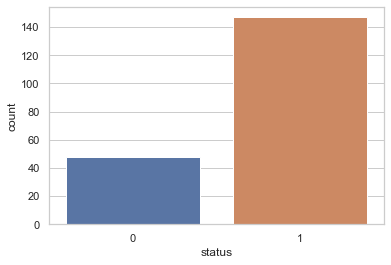

<Figure size 432x288 with 0 Axes>

In [12]:
#plotting  status graphs
sns.countplot(x='status',data=data_set)
plt.show()

plt.savefig('status_count')

In [13]:
parkinsons = len(data_set[data_set['status']==1])
no_parkinsons = len(data_set[data_set['status']==0])


per_parkinsons = parkinsons/(parkinsons+no_parkinsons)
per_no_parkinsons = no_parkinsons/(parkinsons+no_parkinsons)

print("Percentage of people having parkinsons:",per_parkinsons*100)
print("Percentage of people not having parkinsons:",per_no_parkinsons*100)

Percentage of people having parkinsons: 75.38461538461539
Percentage of people not having parkinsons: 24.615384615384617


In [14]:
#getting column names
data_set.columns


Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [15]:
my_cols=set(data_set.columns)
my_cols.remove('status')
my_cols.remove('name')
#independent variables
X=data_set[my_cols]

#depemdent variable
y=data_set.status


In [16]:
#importing class
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#splitting training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#importing class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_reg = LogisticRegression(max_iter=2000)

#fitting the model
log_reg.fit(X_train,y_train)

#predicting the values
y_pred=log_reg.predict(X_test)


cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8,  3],
       [ 1, 37]], dtype=int64)

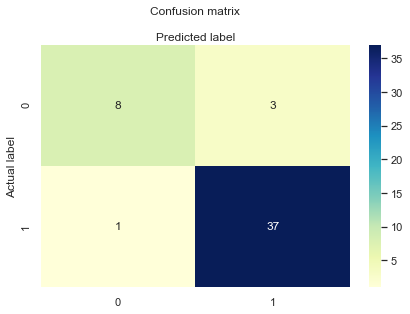

In [112]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.savefig("HeatMap")

In [17]:
#Model evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.9183673469387755
Precision: 0.925
Recall: 0.9736842105263158


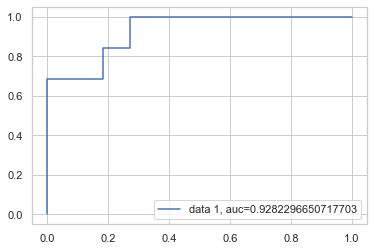

<Figure size 432x288 with 0 Axes>

In [18]:
#ROC curve
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
plt.savefig('ROC')